# Import Libraries

In [1]:
from deepface import DeepFace #pip install deepface

In [2]:
import cv2 #pip install opencv-python

import matplotlib.pyplot as plt

In [3]:
# import haarcascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Emotion Detection on Images

### Image 1

In [15]:
# read image
img = cv2.imread('ronaldo.jpg')

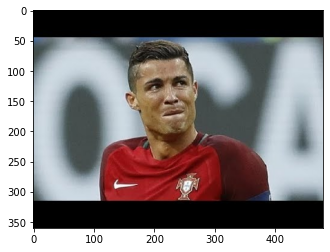

In [4]:
# convert BGR to RGB
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
# analyze the image using deepface
pred = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\bbabi\.deepface\weights\facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:04<00:00, 1.22MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\bbabi\.deepface\weights\age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 539M/539M [08:20<00:00, 1.08MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\bbabi\.deepface\weights\gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [08:06<00:00, 1.10MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\bbabi\.deepface\weights\race_model_single_batch.h5
100%|███████████████████████████████████████████████████████████████████████████████| 537M/537M [07:27<00:00, 1.20MB/s]
Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:18<00:00,  4.66s/it]


In [6]:
pred

{'emotion': {'angry': 25.26475485983433,
  'disgust': 0.027481128561697477,
  'fear': 27.839994091988313,
  'happy': 0.01107355287655744,
  'sad': 32.81372096374977,
  'surprise': 1.0077108359085516,
  'neutral': 13.035257096855986},
 'dominant_emotion': 'sad',
 'region': {'x': 161, 'y': 74, 'w': 123, 'h': 123},
 'age': 25,
 'gender': 'Man',
 'race': {'asian': 8.101174235343933,
  'indian': 8.997058868408203,
  'black': 26.462820172309875,
  'white': 12.919241189956665,
  'middle eastern': 12.357113510370255,
  'latino hispanic': 31.16258680820465},
 'dominant_race': 'latino hispanic'}

In [7]:
pred['dominant_emotion']

'sad'

In [9]:
# draw bounding box for face using facecascade
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

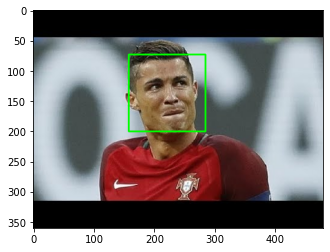

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
# add dominant emotion as text on image
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 
            pred['dominant_emotion'],
            (10,50),
            font,1,
            (0,0,255),
            2,
            cv2.LINE_4);

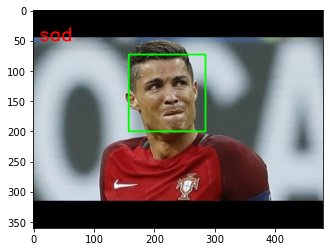

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Image 2

In [4]:
img2 = cv2.imread('messi.jpg')

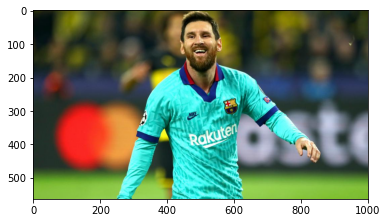

In [5]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [6]:
pred2 = DeepFace.analyze(img2)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:15<00:00,  3.99s/it]


In [7]:
pred2

{'emotion': {'angry': 0.025323894806206226,
  'disgust': 1.0294114893838469e-06,
  'fear': 0.0032869542337721214,
  'happy': 97.94483780860901,
  'sad': 1.750822551548481,
  'surprise': 0.009756623330758885,
  'neutral': 0.2659793710336089},
 'dominant_emotion': 'happy',
 'region': {'x': 439, 'y': 32, 'w': 114, 'h': 114},
 'age': 41,
 'gender': 'Man',
 'race': {'asian': 0.0004739209089166252,
  'indian': 0.0070289926952682436,
  'black': 8.007136784726754e-05,
  'white': 94.44392919540405,
  'middle eastern': 3.3673059195280075,
  'latino hispanic': 2.1811841055750847},
 'dominant_race': 'white'}

In [8]:
pred2['dominant_emotion']

'happy'

In [9]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
  cv2.rectangle(img2, (x,y), (x+w,y+h), (0,255,0), 2)

In [10]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img2, 
            pred2['dominant_emotion'],
            (10,50),
            font,1,
            (0,0,255),
            2,
            cv2.LINE_4);

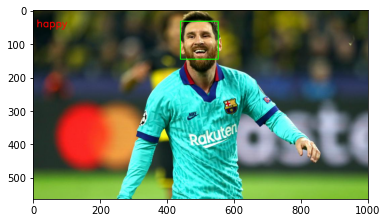

In [11]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

# Live Webcam Input

In [6]:
# start capture
cap = cv2.VideoCapture(1)

# if any error
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret,frame = cap.read()
    
    # analyze using deepface
    result = DeepFace.analyze(frame,actions=['emotion'])
    
    # draw bounding box for face
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        
    # add emotion as text   
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, 
                result['dominant_emotion'],
                (50,50),
                font,1,
                (0,0,255),
                2,
                cv2.LINE_4)
    
    # display ouptut
    cv2.imshow("Original Video",frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()